<a href="https://colab.research.google.com/github/yenlung/Math-in-Jupyter/blob/main/%E4%BD%BF%E7%94%A8%20sympy%20%E5%92%8C%E5%BE%AE%E7%A9%8D%E5%88%86%E7%9A%84%E5%90%84%E7%A8%AE%E7%8E%A9%E8%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

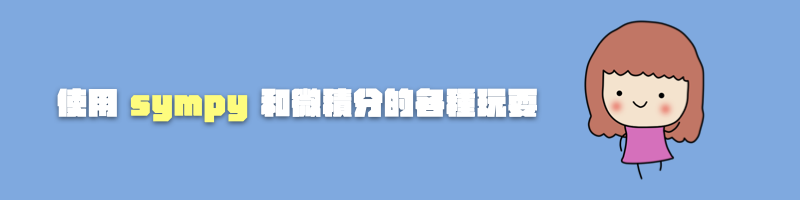

## 1. 讀入我們要使用的套件

以下是一般任何數據分析, 我們推薦的標準套件。

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

今天我們主角是符號型運算的 `sympy` (symbolic python)。符號型運算其實就是「數學課」用的運算方式, 例如 1/2 + 1/3 要告訴我們精確的 5/6, 而不是近似的數值解。

In [ ]:
import sympy as sp

## 2. `sympy` 化

我們先用一個簡單的例子來看符號型運算和傳統的數值型運算有什麼不同, 順便瞭解一下什麼叫 `sympy` 化。

In [ ]:
1/2 + 1/3

0.8333333333333333

這一般電腦的計算, 很明顯是數值的近似解。現在我們要告訴電腦用 `sympy` 去算, 要用一個叫 `sympify` (也就是 `sympy` 化) 的指令, 但 `sympify` 也未免太長了, 所以有一個簡化到不能再簡化的版本 `S`。

In [ ]:
from sympy import S

In [ ]:
S(1)/2 + S(1)/3

5/6

本來就是交給 `sympy` 算的我們自然是不用擔心。

In [ ]:
sp.sqrt(2) * sp.sqrt(3)

sqrt(6)

如果我們要看到近似的數值, 可以用 `n` 這個 method。

In [ ]:
π = sp.pi

In [ ]:
π

pi

In [ ]:
π.n(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

考一下 `sympy` 三角函數程度如何。

In [ ]:
sp.sin(π/3)

sqrt(3)/2

## 3. 令數學式子用的變數

電腦中的變數都要先給一個數值, 比如說

```python
egg = 87
```

不然呼叫時會出現錯誤。但是數學中我們常常要用的變數, 像是

$$f(x) = x^2$$

沒有指定值是多少, 甚至這樣就要給他微分或積分, 這該如何是好? 所以在 `sympy` 中就要有意識的告訴 Python, 這是我們要留給數學變數用的。定義方式有三種。

### (1) 使用 `Symbol`

假設我們要把 $x$ 定義為數學上的變數。



In [ ]:
x = sp.Symbol('x')

In [ ]:
x**2

x**2

是不是! Python 真的不會抱怨了! 但是為什麼這裡 $x$ 要寫兩次呢? 原因是前面的 `x` 是我們在電腦中要用的變數名稱, 後面的是顯示的名稱。在正常情況, 這兩者名稱當然是一樣的, 但有時我們也會設不一樣的名稱。

比如說下面這個例子。

In [ ]:
alpha = sp.Symbol('alp')

In [ ]:
alpha**2

alp**2

這很醜啊, `sympy` 知道你想要什麼, 所以如果看到顯示名稱叫 `alpha`, 他會知道要顯示 $\alpha$!

In [ ]:
alpha = sp.Symbol('alpha')

In [ ]:
sp.sqrt(alpha)

sqrt(alpha)

### (2) 用 `symbols` 一次令多個變數

事實上我們很少用 `Symbol` 這個指令, 而是用更方便的版本, 一次令多個變數的 `symbols` (沒錯, 變小寫加 `s`!)

In [ ]:
x, y, z = sp.symbols('x,y,z')

試用一下。

In [ ]:
x**2 * y + 2*z

x**2*y + 2*z

### (3) 神秘的 `abc` 子套件

雖然偶而我們會想把變數名稱、顯示名稱選用不同的名字 (例如 `a` 這個變數, 顯示名稱是 $\alpha$。但很多情況我們會用相同的名稱, 那不管用 `Symbol` 或 `symbols` 都太麻煩了。

這裡我們介紹 `abc` 這個在 `sympy` 中的神秘子套件, 把

$$x, y, z, a, b, c, \alpha, \beta, \gamma$$

全部設成我們要當 `sympy` 用的變數。

In [ ]:
from sympy.abc import x, y, z, t, a, b, c, alpha, beta, gamma

我們來試試看。

In [ ]:
a*x + b*y + c*z + gamma*x**2

a*x + b*y + c*z + gamma*x**2

## 4. 令一個給 `sympy` 用的函數

### 定義一個計算式子

在 `sympy` 中要令一個函數 (事實上是定義一個式子) 很簡單。

In [ ]:
f = x**2

In [ ]:
f

x**2

### 用 `subs` 代值

但要記得, 這不是一個 Python 的函式, 所以要計算 $f(87)$ 不能用

```python
f(87)
```

要用 `subs` 代入。

In [ ]:
f.subs(x, 87)

7569

### 多個變數代值

要是這函式有多個變數怎麼辦呢? 那就用一個串列。

In [ ]:
g = x*y + 1

In [ ]:
g.subs([(x, 94), (y, 87)])

8179

### 畫出函數圖形

我們甚至可以快速畫出這個函數的圖形。

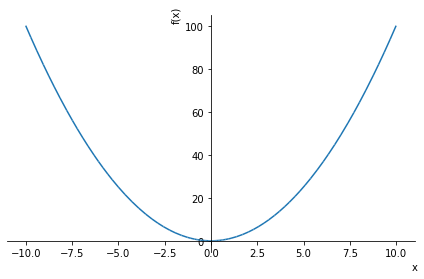

In [ ]:
sp.plot(f)

也可以指定 $x$ 的範圍。

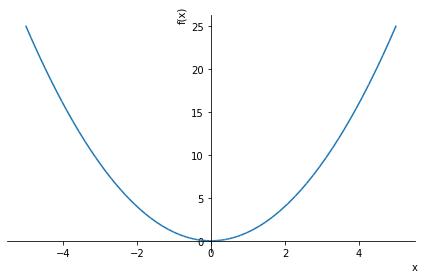

In [ ]:
sp.plot(f, (x, -5, 5))

### 用 `PlotGrid` 同時顯示多個圖

比較進階的是我們可以用 PlotGrid 同時顯式多個圖形。我們來用四大天王函數來試試。


In [ ]:
from sympy.plotting import PlotGrid

In [ ]:
p1 = sp.plot(x**2,  show=False)
p2 = sp.plot(sp.exp(x), show=False)
p3 = sp.plot(sp.log(x), show=False)
p4 = sp.plot(sp.sin(x), show=False)

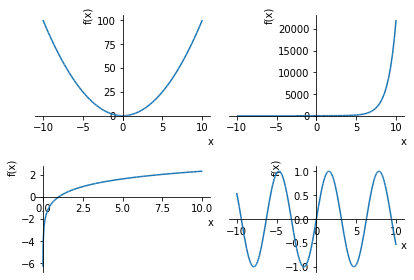

In [ ]:
PlotGrid(2, 2, p1, p2, p3, p4)

## 5. 來和 `sympy` 比求極限的功力

### 極限的基本求法

我們終於要進行和微積分相關的內容了! 首先是求極限, 基本用法很簡單直覺:

```python
sp.limit(函數, 變數, 求極限的點)
```

In [ ]:
sp.limit(x**2+1, x, 2)

5

哦, `sympy` 會耶! 但這麼簡單的實在沒有很令人感動。來個略略難一點的例子。

In [ ]:
f = (x**2+2*x-3)/(x-1)

In [ ]:
f

(x**2 + 2*x - 3)/(x - 1)

In [ ]:
sp.limit(f, x, 1)

4

### 分段定義函數

分段定義函數是可能的嗎? 比方說課本習題的一個例子:

$$f(x) = \begin{cases}
2x+1 & \mbox{當 } x\leq 2\\
7-x  & \mbox{當 } 2< x < 4\\
x    & \mbox{當 } x\geq 4
\end{cases}$$

In [ ]:
f = sp.Piecewise((2*x+1, x<=2), (7-x, x<4), (x, True))

### 不連續函數畫圖技巧

這個函數在 $x=4$ 是不連續的, 如果沒有不連續的點, `sympy` 要畫個分段定義函數還是強強的。但是有不連續的點, `sympy` 會把這點連起來! 為了看到正確的圖形, 我們用了分開畫的小技巧。

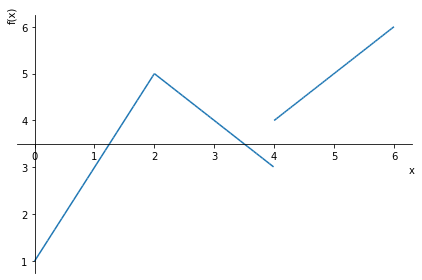

In [ ]:
p1 = sp.plot(f, (x, 0, 3.99), show=False)
p2 = sp.plot(f, (x, 4, 6), show=False)
p1.extend(p2)
p1.show()

### 單邊極限的計算

然後我們想計算

$$\lim_{x \to 4^-} f(x)$$

和

$$\lim_{x \to 4^+} f(x)$$

首先先看一般極限的計算。

In [ ]:
sp.limit(f, x, 5)

5

這是正確的, 可惜單邊極限在 `sympy` 有 bug, 我們只好算更簡單的單邊極限。

In [ ]:
sp.limit(1/x, x, 0, '+')

oo

In [ ]:
sp.limit(1/x, x, 0, '-')

-oo

### 無窮大 $\infty$ 的輸入方式

順便說明一下, 在 `sympy` 要表示 $\infty$ 是用很可愛的 `oo`。

In [ ]:
f = (4*x**3-5)/(x**3-2*x+9487)

In [ ]:
f

(4*x**3 - 5)/(x**3 - 2*x + 9487)

In [ ]:
sp.limit(f, x, sp.oo)

4

## 6. 微分

### 標準導數求法

到了看 `sympy` 微分功力的時刻了。

In [ ]:
f = x**4 - 3*x**2 + 2*x - 5

In [ ]:
f

x**4 - 3*x**2 + 2*x - 5

In [ ]:
sp.diff(f, x)

4*x**3 - 6*x + 2

### 高階導數

還可以啦, 畢竟很簡單。二階導數可以怎麼做呢?

In [ ]:
sp.diff(f, x, x)

6*(2*x**2 - 1)

另外也可以這樣寫。

In [ ]:
sp.diff(f, x, 2)

6*(2*x**2 - 1)

### 指數、對數、三角函數的導數

指數、對數函數也來試試。

In [ ]:
sp.diff(sp.exp(x), x)

exp(x)

In [ ]:
sp.diff(sp.log(x), x)

1/x

事實上三角函數也是可以的!

In [ ]:
sp.diff(sp.sin(x), x)

cos(x)

In [ ]:
sp.diff(sp.tan(x), x)

tan(x)**2 + 1

注意我們平常習慣看到的是 $\sec^2(x)$。

In [ ]:
sp.diff(sp.sec(x), x)

tan(x)*sec(x)

### 反三角函數的微分

看看好像很難的反三角函數的微分。

In [ ]:
sp.diff(sp.asin(x), x)

1/sqrt(1 - x**2)

In [ ]:
sp.diff(sp.acos(x), x)

-1/sqrt(1 - x**2)

In [ ]:
sp.diff(sp.atan(x), x)

1/(x**2 + 1)

### 隱函數微分

這隱函數微分總會難倒 `sympy` 了吧? 我們來看個課本的例子。注意我們要給 `sympy` $f(x,y)=0$ 這樣的 $f(x,y)$, 所以課本上的

$$y^3 + x^3y - 2xy^2 + 4x^2 = 4$$

我們要令成

$$y^3 + x^3y - 2xy^2 + 4x^2 - 4$$

In [ ]:
h = y**3 + x**3*y - 2*x*y**2 + 4*x**2 - 4

In [ ]:
h

x**3*y + 4*x**2 - 2*x*y**2 + y**3 - 4

In [ ]:
sp.idiff(h, y, x)

(-3*x**2*y - 8*x + 2*y**2)/(x**3 - 4*x*y + 3*y**2)

不得了, 這正確答案!! 我們當然也可以求課本上說這條式子定義出的曲線, 在 $x=1, y=0$ 的切線斜率。

In [ ]:
sp.idiff(h, y, x).subs([(x,1), (y,0)])

-8

### 隱函數的畫圖

完全正確! 好奇的話我們也可以畫一下這個式子定義出的曲線圖形。`sympy` 如果是

$$f(x,y) = a$$

這種形式的隱函數, 要用這樣的方式輸入這個等式:

```python
sp.Eq(f, a)
```

然後用 `plot_implicit` 畫出來。

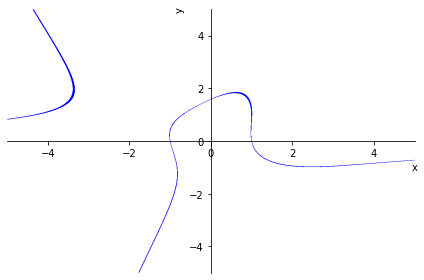

In [ ]:
sp.plot_implicit(sp.Eq(h, 0))

## 7. 關於函數的極值

### `solveset` 找微分等於 0 的點

我們知道一個函數的極值是發生在臨界點, 也就是微分等於 0 或是微分不存在的那些點。我們試試可愛的 `sympy` 可不可以幫我們算。

$$f(x) = x^4-8x+1$$

In [ ]:
f = x**4 - 8*x**2 + 1

In [ ]:
f

x**4 - 8*x**2 + 1

In [ ]:
f1 = sp.diff(f, x)

In [ ]:
sp.solveset(f1)

FiniteSet(-2, 0, 2)

### 二階導數判別極大極小

In [ ]:
f2 = sp.diff(f, x, x)

In [ ]:
f2.subs(x, -2)

32

In [ ]:
f2.subs(x,0)

-16

In [ ]:
f2.subs(x,2)

32

### 確認函數在區間的遞增、遞減性

由二階導數判別相對極值的方法, 可知函數在 $x=-2$ 時有相對極小值, 在 $x=0$ 時有相對極大值, 在 $x=2$ 時有相對極小值。

我們也學過, 函數的遞增遞減性只有在臨界點會產生變化。在我們這個例子, 我們可以判斷這幾個區間遞增遞減的情況:

$$(-\infty, -2), (-2,0), (0,2), (2, \infty)$$

還記得就是區間中隨便找個代表點, 代入一階導數, 看正負號就可知函數在這個區間是遞增或是遞減的。

這個例子我們會知道函數是

遞減 -> 遞增 -> 遞減 -> 遞增

用 `sympy` 可以確認一下。

In [ ]:
sp.is_decreasing(f, sp.Interval(-sp.oo, -2))

True

In [ ]:
sp.is_increasing(f, sp.Interval(-2, 0))

True

In [ ]:
sp.is_decreasing(f, sp.Interval(0, 2))

True

In [ ]:
sp.is_increasing(f, sp.Interval(2, sp.oo))

True

### 指定定義域是實數的方法

使用時要小心一個狀況, 假設我們的函數是這個:

$$f(x) = x^3 + x$$

In [ ]:
f = x**3 + x

In [ ]:
f

x**3 + x

In [ ]:
f1 = sp.diff(f, x)

In [ ]:
f1

3*x**2 + 1

In [ ]:
sp.solveset(f1, x)

FiniteSet(-sqrt(3)*I/3, sqrt(3)*I/3)

等一下, 這在實數上是沒有解的, 所以無局部極大或極小。雖然我們這樣也看得出來, 但能不能讓 `sympy` 告訴我們實數上是無解的呢?

In [ ]:
sp.solveset(f1, x, domain=S.Reals)

EmptySet

### 用 `singularities` 找出微分不存在的點

微分不存在的點呢? 我們可以用 `singularities` 來確認是不是有微分不存在的點。首先先看我們標準例子

$$f(x) = |x|$$

In [ ]:
from sympy.calculus import singularities

In [ ]:
f = sp.Abs(x)

In [ ]:
f

Abs(x)

In [ ]:
f1 = sp.diff(f, x)

In [ ]:
singularities(f1, x)

FiniteSet(0)

$$f(x) = \dfrac{1}{x} + x$$

In [ ]:
f = 1/x + x

In [ ]:
f1 = sp.diff(f, x)

In [ ]:
singularities(f1, x)

FiniteSet(0)

## 8. 積分

### 不定積分

終於到了我們積分的時刻。首先, 我們先來個假的積分, 我是說, 不定積分。

In [ ]:
f = sp.sqrt(31*x + 2)

In [ ]:
f

sqrt(31*x + 2)

In [ ]:
sp.integrate(f, x)

2*(31*x + 2)**(3/2)/93

答案是正確的, 但是沒有加 C 要扣分...

### 定義分

再來看定積分。

In [ ]:
f = x/(sp.sqrt(x**2+4))

In [ ]:
f

x/sqrt(x**2 + 4)

In [ ]:
sp.integrate(f, (x,0,2))

-2 + 2*sqrt(2)

事實上這是 `sympy`, 你要看一般從 a 到 b 的積分值也可以。

In [ ]:
sp.integrate(f, (x,a,b))

-sqrt(a**2 + 4) + sqrt(b**2 + 4)

### 變數變換等級的題目

習題抽幾題考考 `sympy`。

$$\int \dfrac{\sqrt{\ln x}}{x} \, dx$$

In [ ]:
sp.integrate(sp.sqrt(sp.log(x))/x, x)

2*log(x)**(3/2)/3

$$\int_0^1 x e^{-x^2} \, dx$$

In [ ]:
sp.integrate(x*sp.exp(-x**2), (x, 0, 1))

1/2 - exp(-1)/2

### 微積分基本定理

還記得微積分基本定理有一個形式, 告訴我們微分和積分基本上是反運算。寫成數學式子是這樣:

$$\dfrac{d}{dx} \int_a^x f(t) \, dt = f(x)$$

這寫起來就好可怕的東西, `sympy` 真的會嗎? 我們來試試。

In [ ]:
f = t**3/(t**2+1)

In [ ]:
f

t**3/(t**2 + 1)

In [ ]:
sp.diff(sp.integrate(f, (t, a, x)),x)

x - x/(x**2 + 1)

### 式子的化簡

檢查一下, 這是正確答案。自然我們可以叫 `sympy` 幫我們化簡整理。

In [ ]:
sp.simplify(sp.diff(sp.integrate(f, (t, a, x)),x))

x**3/(x**2 + 1)

### 部分積分等級的題目

至此都是「簡單的」積分。那需要用到積分大魔王「部分積分」技巧的, `sympy` 還會做嗎?

$$\int x e^x \, dx$$

In [ ]:
sp.integrate(x*sp.exp(x), x)

(x - 1)*exp(x)

$$\int \ln x \, dx$$

In [ ]:
sp.integrate(sp.log(x), x)

x*log(x) - x

### 暇積分

好像都難不倒 `sympy`, 那最後我們來看看暇積分吧。

$$\int_1^\infty \dfrac{1}{x^2} \, dx$$

In [ ]:
sp.integrate(1/x**2, (x, 1, sp.oo))

1

$$\int_{-\infty}^{\infty} 2xe^{-x^2} \, dx$$

In [ ]:
sp.integrate(2*x*sp.exp(-x**2), (x, -sp.oo, sp.oo))

0

## 9. 泰勒級數

### 求指定階數的泰勒展開

最後我們來看超級酷炫, 把可以一直微分的函數轉成多項式的技術: 泰勒級數!

一個函數 $f(x)$ 在 $x=a$ 的泰勒展開式是長這個樣子:

$$f(x) = f(a) + f'(a) (x-a) + \dfrac{f''(a)}{2!} (x-a)^2 + \cdots + \dfrac{f^{(n)}(a)}{n!} (x-a)^n + \cdots$$

這裡順便說一下, 我們差不多從微積分的第一天開始, 就灌輸大家一個概念: 一個函數 $f(x)$ 如果在 $x=a$ 那點的切線存在的話 (也就是可微), 那這個函數的圖形 $y=f(x)$ 在 $x=a$ 附近和那條切線長得很像。也就是說當 $x$ 和 $a$ 很接近的時候, 我們有:

$$f(x) \simeq f(a) + f'(a) (x-a)$$

耶, 這就是泰勒展開式的第一項啊! 如果我們再用二階導數再調整一點就會更像, 三階再調一點, ... 這就得到泰勒級數!

說得這麼多, 結果 `sympy` 要求泰勒展開式很容易。我們來看看我們四大天王中的

$$f(x)=e^x$$

在 $x=0$ 的泰勒展開式。

In [ ]:
f = sp.exp(x)

In [ ]:
sp.series(f, n=10)

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + x**6/720 + x**7/5040 + x**8/40320 + x**9/362880 + O(x**10)

最後一項是說真正的 $e^x$ 和這個泰勒展開式差距最多是 $x^{10}$ 的某個固定的常數倍。

### `removeO` 去掉誤差項

計算的時候我們希望不要有這個誤差估計項, 那要怎麼做呢?

In [ ]:
f_taylor = sp.series(f, n=10).removeO()

In [ ]:
f_taylor

x**9/362880 + x**8/40320 + x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1

### 用泰勒多項式估計函數值

把一個函數變成可愛的多項式, 就真的可以算了! 比如說, 這裡我們可以開心的算一下 $e = e^1$ 的值。

In [ ]:
e = f_taylor.subs(x,1)

In [ ]:
e

98641/36288

等等, 這個數字好像沒什麼意義。不過我們前面說過換成數值解的方法。

In [ ]:
e.n(100)

2.718281525573192239858906525573192239858906525573192239858906525573192239858906525573192239858906526

好奇的話我們可以比較一下正確答案。

In [ ]:
sp.exp(1).n(100)

2.718281828459045235360287471352662497757247093699959574966967627724076630353547594571382178525166427

### 互動感受泰勒多項式

我們來用互動感受一下泰展多項式越來越像原來函數的感覺。

In [ ]:
from ipywidgets import interact

In [ ]:
def taylor(n=10):
    f = sp.exp(x)
    egg = sp.series(f, n=n)
    f_taylor = egg.removeO()
    p1 = sp.plot(f, (x, -5, 5), line_color='blue', show=False)
    p2 = sp.plot(f_taylor, (x, -5, 5), line_color='red', show=False)
    p1.extend(p2)
    p1.show()

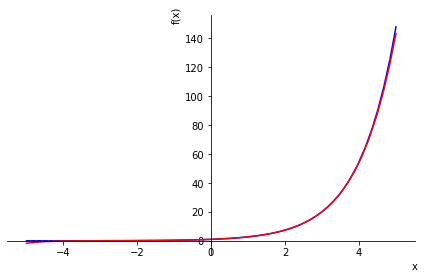

In [ ]:
taylor(n=10)

In [ ]:
interact(taylor, n=(1,50))

interactive(children=(IntSlider(value=10, description='n', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.taylor>

### 應用範例: 計算 $\pi$ 值

我們知道

$$\tan(\pi/4) = 1$$

In [ ]:
sp.tan(π/4)

1

也就是說

$$\arctan(1) = \pi/4$$

於是我們求出 $\arctan(x)$ 的泰勒多項式, 計算 $\arctan(1)$ 的值, 乘以 4 就是 $\pi$!。

In [ ]:
f = sp.atan(x)

In [ ]:
n = 100

f_taylor = sp.series(f, n=n).removeO()

In [ ]:
pi = 4*f_taylor.subs(x, 1)

In [ ]:
pi

3400605476464206445954873476681150352328/1089380862964257455695840764614254743075

In [ ]:
pi.n(100)

3.121594652591010478513182974309492432921769645371316046487107937488694108637565199901122799959931506

等等, 這小數點第二位就錯了, 這實在太遜了一點! 沒有錯, 其實這是收斂超慢計算 $\pi$ 的方法。比較好的方法像是數學神人拉馬努金 (Ramanujan) 我們根本猜不到他怎麼想出來, 和 $\pi$ 有關的等式:

$$\dfrac{4}{\pi} = \dfrac{1}{882} \sum_{n=0}^\infty \dfrac{(-1)^n(4n)!}{(4^nn!)^4} \dfrac{1123 + 21460n}{882^{2n}}$$

有興趣可以用 `sympy` 算算看, 會發現比我們上面用的方法好太多!